###Task 1: Data Understanding and Visualization

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


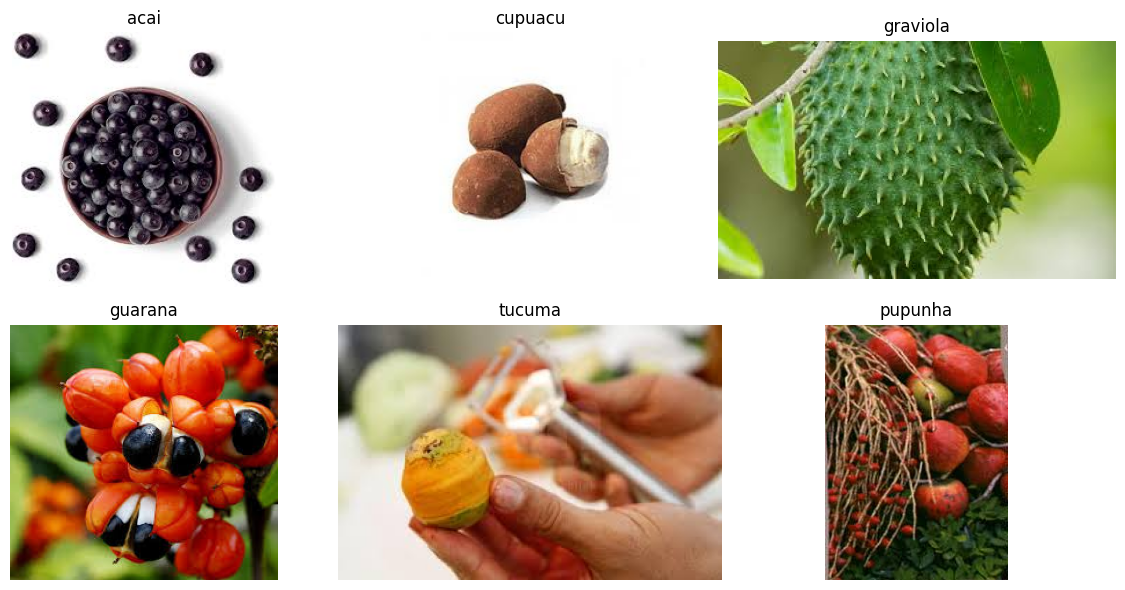

In [4]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the train dataset
train_dir = "/content/drive/MyDrive/AI and ML/FruitinAmazon/train"

# Get the list of class directions
class_dirs = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]

# Get the list of class directories
class_dirs = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]

# Select one random image from each class
selected_images = []
labels = []

for class_dir in class_dirs:
    class_path = os.path.join(train_dir, class_dir)
    images = [img for img in os.listdir(class_path) if img.endswith(('.png', '.jpg', '.jpeg'))]
    if images:
        selected_image = random.choice(images)
        selected_images.append(os.path.join(class_path, selected_image))
        labels.append(class_dir)

# Display images in a grid with two rows
num_images = len(selected_images)
cols = num_images // 2 + num_images % 2  # Ensure we have two rows
rows = 2

fig, axes = plt.subplots(rows, cols, figsize=(12, 6))

# Flatten axes for easy iteration if necessary
axes = axes.flatten()

for i, img_path in enumerate(selected_images):
    img = mpimg.imread(img_path)
    axes[i].imshow(img)
    axes[i].set_title(labels[i])
    axes[i].axis('off')

# Hide any extra subplot spaces if class count is odd
for i in range(len(selected_images), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


###Task 2: Loading and Preprocessing Image Data in keras

In [5]:
import tensorflow as tf

# Define the dataset
train_dir = "/content/drive/MyDrive/AI and ML/FruitinAmazon/train"

# Define image size and batch size
img_height = 128
img_width = 128
batch_size = 32
validation_split = 0.2

# Create a preprocessing layer for normalization
rescale = tf.keras.layers.Rescaling(1./255)  # Normalize pixel values to [0,1]

# Load training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels="inferred",  # Use folder names as labels
    label_mode="int",  # Encode labels as integers
    image_size=(img_height, img_width),
    interpolation="nearest",
    batch_size=batch_size,
    shuffle=True,
    validation_split=validation_split,
    subset="training",
    seed=123  # Ensures the same split each time
)

# Apply normalization to training dataset
train_ds = train_ds.map(lambda x, y: (rescale(x), y))

# Load validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="int",
    image_size=(img_height, img_width),
    interpolation="nearest",
    batch_size=batch_size,
    shuffle=False,  # No need to shuffle validation data
    validation_split=validation_split,
    subset="validation",
    seed=123
)

# Apply normalization to validation dataset
val_ds = val_ds.map(lambda x, y: (rescale(x), y))

# Display dataset structure
print(f"Training dataset: {train_ds}")
print(f"Validation dataset: {val_ds}")


Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.
Training dataset: <_MapDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
Validation dataset: <_MapDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


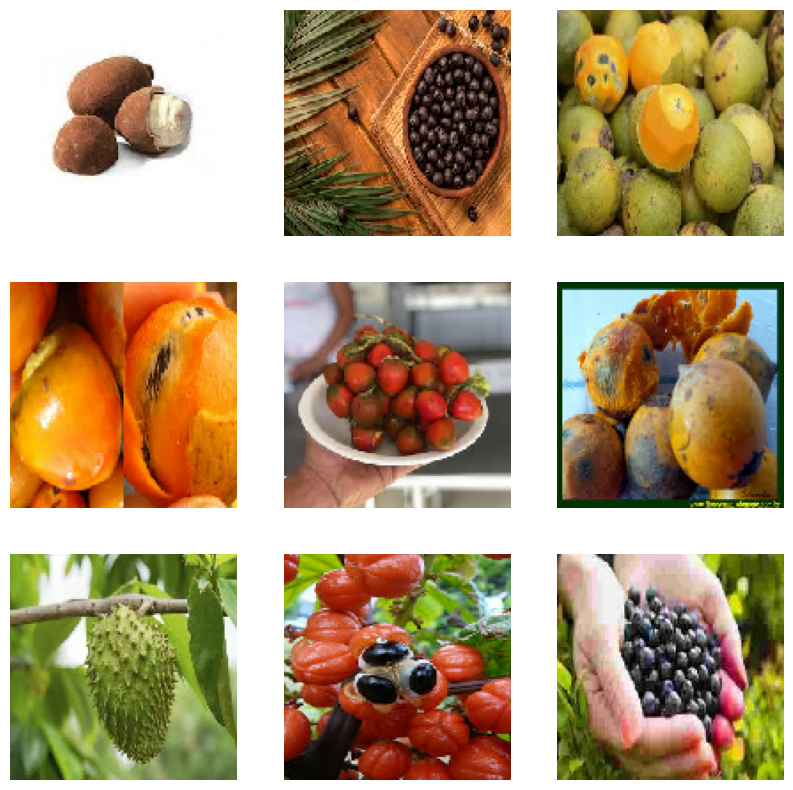

In [6]:
import matplotlib.pyplot as plt

# Get a batch of images and labels from train_ds
image_batch, label_batch = next(iter(train_ds))

# Plot some images
plt.figure(figsize=(10, 10))
for i in range(9):  # Display 9 images
    plt.subplot(3, 3, i + 1)  # Indented properly
    plt.imshow(image_batch[i].numpy())  # Convert tensor to numpy
    plt.axis("off")  # Hide axis

plt.show()  # Show the images


###Task 3 - Implement a CNN

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_cnn(input_shape, num_classes):
  model = models.Sequential()

  # Convolutional Layer 1
  model.add(layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu', input_shape=input_shape))
  # Pooling Layer 1
  model.add(layers.MaxPooling2D((2, 2), strides=2))

  # Convolutional Layer 2
  model.add(layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu'))
  # Pooling Layer 2
  model.add(layers.MaxPooling2D((2, 2), strides=2))

  # Flatten Layer
  model.add(layers.Flatten())

  # Fully Connected Layers
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(128, activation='relu'))

  # Output Layer
  model.add(layers.Dense(num_classes, activation='softmax'))

  return model


# Change input_shape to match the image size used in the dataset
input_shape = (128, 128, 3)
num_classes = 10
model = build_cnn(input_shape, num_classes)
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,970 (8.08 MB)

 Trainable params: 2,116,970 (8.08 MB)

 Non-trainable params: 0 (0.00 B)

###Task 4: Compile the Model

In [8]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Step 1: Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])




###Task 4: Train the Model

In [9]:
# Define callbacks
checkpoint_callback = ModelCheckpoint(
    'best_model.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=1,
    mode='min'
)

early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True, # Restore the weights of the best model
    verbose=1

# Step 2: Train the Model
history = model.fit(
    train_ds,                  # Training dataset
    epochs=250,                # Number of epochs
    batch_size=16,             # Batch size
    validation_data=val_ds,    # Validation dataset
    callbacks=[checkpoint_callback, early_stopping_callback],  # Callbacks
    verbose=1                  # Show progress during training
)


Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.1244 - loss: 2.2120
Epoch 1: val_loss improved from inf to 1.74935, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 17s 4s/step - accuracy: 0.1280 - loss: 2.1992 - val_accuracy: 0.0556 - val_loss: 1.7494
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 513ms/step - accuracy: 0.2049 - loss: 1.8408
Epoch 2: val_loss improved from 1.74935 to 1.68922, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 914ms/step - accuracy: 0.2057 - loss: 1.8407 - val_accuracy: 0.5000 - val_loss: 1.6892
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4462 - loss: 1.5341
Epoch 3: val_loss did not improve from 1.68922
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.4388 - loss: 1.5295 - val_accuracy: 0.1111 - val_loss: 2.3011
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 955ms/step - accuracy: 0.6308 - loss: 1.2870
Epoch 4: val_loss improved from 1.68922 to 1.56302, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.6259 - loss: 1.2803 - val_accuracy: 0.2778 - val_loss: 1.5630
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step - accuracy: 0.6343 - loss: 0.9971
Epoch 5: val_loss improved from 1.56302 to 0.82754, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 572ms/step - accuracy: 0.6389 - loss: 0.9902 - val_accuracy: 0.8333 - val_loss: 0.8275
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step - accuracy: 0.9120 - loss: 0.6898
Epoch 6: val_loss did not improve from 0.82754
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 472ms/step - accuracy: 0.8993 - loss: 0.7023 - val_accuracy: 0.5000 - val_loss: 1.4745
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 948ms/step - accuracy: 0.8154 - loss: 0.6117
Epoch 7: val_loss improved from 0.82754 to 0.76459, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.8129 - loss: 0.6181 - val_accuracy: 0.8333 - val_loss: 0.7646
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 566ms/step - accuracy: 0.9601 - loss: 0.3725
Epoch 8: val_loss improved from 0.76459 to 0.52505, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 829ms/step - accuracy: 0.9596 - loss: 0.3630 - val_accuracy: 0.8333 - val_loss: 0.5251
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step - accuracy: 0.9450 - loss: 0.2438
Epoch 9: val_loss did not improve from 0.52505
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 630ms/step - accuracy: 0.9449 - loss: 0.2426 - val_accuracy: 0.7778 - val_loss: 0.7314
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - accuracy: 0.9855 - loss: 0.1119
Epoch 10: val_loss did not improve from 0.52505
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 446ms/step - accuracy: 0.9822 - loss: 0.1163 - val_accuracy: 0.8333 - val_loss: 0.8839
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step - accuracy: 0.9902 - loss: 0.0978
Epoch 11: val_loss did not improve from 0.52505
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 439ms/step - accuracy: 0.9891 - loss: 0.0986 - val_accuracy: 0.8889 - val_loss: 0.5619
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 636ms/step - accuracy: 0.9797 - loss: 0.0698
Epoch 12: val_loss improved from 0.52505 to 0.43968, s

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 840ms/step - accuracy: 0.9813 - loss: 0.0679 - val_accuracy: 0.8333 - val_loss: 0.4397
Epoch 13/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step - accuracy: 1.0000 - loss: 0.0390
Epoch 13: val_loss did not improve from 0.43968
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 607ms/step - accuracy: 1.0000 - loss: 0.0410 - val_accuracy: 0.8333 - val_loss: 0.5999
Epoch 14/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - accuracy: 1.0000 - loss: 0.0405
Epoch 14: val_loss did not improve from 0.43968
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 531ms/step - accuracy: 1.0000 - loss: 0.0406 - val_accuracy: 0.7778 - val_loss: 0.7825
Epoch 15/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step - accuracy: 0.9190 - loss: 0.4072
Epoch 15: val_loss did not improve from 0.43968
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 453ms/step - accuracy: 0.9253 - loss: 0.3759 - val_accuracy: 0.8333 - val_loss: 0.7381
Epoch 16/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step - accuracy: 0.9803 - loss: 0.0563
Epoch 16: val_loss did not improve from 0.43968
3/3 

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 774ms/step - accuracy: 1.0000 - loss: 0.0242 - val_accuracy: 0.8333 - val_loss: 0.4280
Epoch 20/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step - accuracy: 1.0000 - loss: 0.0246
Epoch 20: val_loss did not improve from 0.42804
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 440ms/step - accuracy: 1.0000 - loss: 0.0251 - val_accuracy: 0.8333 - val_loss: 0.4422
Epoch 21/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step - accuracy: 0.9797 - loss: 0.0455
Epoch 21: val_loss did not improve from 0.42804
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 524ms/step - accuracy: 0.9813 - loss: 0.0436 - val_accuracy: 0.8333 - val_loss: 0.5682
Epoch 22/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step - accuracy: 1.0000 - loss: 0.0140
Epoch 22: val_loss did not improve from 0.42804
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 441ms/step - accuracy: 1.0000 - loss: 0.0137 - val_accuracy: 0.7778 - val_loss: 0.6886
Epoch 23/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step - accuracy: 1.0000 - loss: 0.0090
Epoch 23: val_loss did not improve from 0.42804
3/3 

###Task 5: Evaluate the Model

In [10]:
# Evaluate the model on the validation dataset
val_loss, val_accuracy = model.evaluate(val_ds)

print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - accuracy: 0.8333 - loss: 0.4280
Validation Loss: 0.42804181575775146
Validation Accuracy: 0.8333333134651184


###Task 6: Save the Model

In [11]:
# Save the trained model to an .h5 file
model.save('/content/best_model.h5')
print("Model saved to /content/best_model.h5 ")

Model saved to /content/best_model.h5 


###Task 6: Load the Model

In [12]:
# Load the saved model
loaded_model = tf.keras.models.load_model('/content/best_model.h5')
print("Model loaded successfully")

# Re-evaluate the model on the validation/test set
test_loss, test_accuracy = loaded_model.evaluate(val_ds)
print(f"Re-evaluated Test Loss: {test_loss}")
print(f"Re-evaluated Test Accuracy: {test_accuracy}")


Model loaded successfully
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.8333 - loss: 0.4280
Re-evaluated Test Loss: 0.42804181575775146
Re-evaluated Test Accuracy: 0.8333333134651184


###Task 7: Predictions and Classification Report

In [13]:
from collections import Counter
import numpy as np
from sklearn.metrics import classification_report

# Check the class distribution in the validation dataset
y_true = np.concatenate([y for x, y in val_ds], axis=0)
print(Counter(y_true))  # This will print the number of samples per class

# Get predictions on the validation dataset
y_pred = model.predict(val_ds)
y_pred_labels = np.argmax(y_pred, axis=-1)

# Generate the Classification Report with zero_division to handle ill-defined metrics
report = classification_report(y_true, y_pred_labels, zero_division=0)
print(report)


Counter({np.int32(5): 15, np.int32(4): 3})
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           4       1.00      0.67      0.80         3
           5       0.93      0.87      0.90        15

    accuracy                           0.83        18
   macro avg       0.64      0.51      0.57        18
weighted avg       0.94      0.83      0.88        18

